In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Titanic /train.csv')

<AxesSubplot:xlabel='Survived', ylabel='count'>

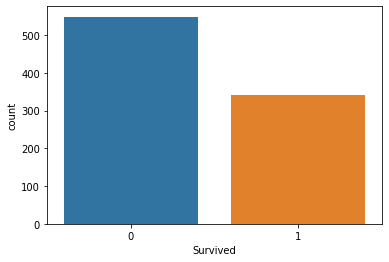

In [ ]:
sns.countplot(data=df, x='Survived')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.corr()['Survived'].apply(lambda x:abs(x)).sort_values(ascending=False)

Survived       1.000000
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.077221
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64

In [ ]:
featured_df = df.drop(['PassengerId'], axis=1).corr()
print(featured_df)
featured_val = featured_df.corr()['Survived'].apply(lambda x : abs(x)).sort_values(ascending=False).drop(['Survived'], axis=0)

(featured_val / sum(featured_val))

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


Pclass    0.461368
Fare      0.360234
SibSp     0.144753
Age       0.021088
Parch     0.012557
Name: Survived, dtype: float64

In [ ]:
np.arange(0, 5)/sum(np.arange(5))

array([0. , 0.1, 0.2, 0.3, 0.4])

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<AxesSubplot:>

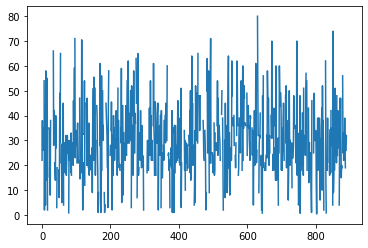

In [ ]:
df['Age'].plot()

(array([0.01238998, 0.00563181, 0.00535022, 0.02703268, 0.03435403,
        0.03041176, 0.02477995, 0.01886656, 0.01323475, 0.01098203,
        0.00675817, 0.00506863, 0.00394227, 0.00084477, 0.00112636,
        0.00028159]),
 array([ 0.42   ,  5.39375, 10.3675 , 15.34125, 20.315  , 25.28875,
        30.2625 , 35.23625, 40.21   , 45.18375, 50.1575 , 55.13125,
        60.105  , 65.07875, 70.0525 , 75.02625, 80.     ]),
 <BarContainer object of 16 artists>)

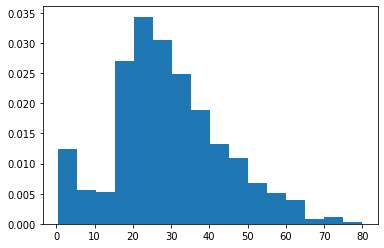

In [ ]:
ages = df['Age'].dropna().values
plt.hist(ages, bins=16, density=True)

In [ ]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


(array([644.,   0.,   0.,   0.,   0., 168.,   0.,   0.,   0.,  77.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

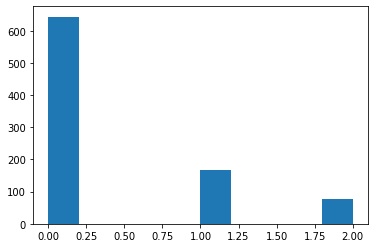

In [ ]:
embarked = df[df['Embarked'].notna()]['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2])
plt.hist(embarked.values)

In [ ]:
df['Embarked'] = df['Embarked'].fillna('S')
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
# fillna ages
# no_ages = df[df['Age'].isna()]['Age']
# aged = df['Age'].dropna().values
# ages = np.random.choice(aged,size=len(no_ages), replace=False)
# age_series = pd.Series(ages, index=no_ages.index)
# df['Age'] = df['Age'].fillna(age_series)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [ ]:
df_val = df[df.columns.difference(['PassengerId', 'Name', 'Ticket', 'Cabin'])]
df_val['Embarked'] = df_val['Embarked'].replace(['S','C', 'Q'], [0, 1, 2])
df_val['Sex'] = df_val['Sex'].replace(['male', 'female'], [0, 1])
df_val

<ipython-input-18-a4308e1de6b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['Embarked'] = df_val['Embarked'].replace(['S','C', 'Q'], [0, 1, 2])
<ipython-input-18-a4308e1de6b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['Sex'] = df_val['Sex'].replace(['male', 'female'], [0, 1])


,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.000000,0,7.2500,0,3,0,1,0
1,38.000000,1,71.2833,0,1,1,1,1
2,26.000000,0,7.9250,0,3,1,0,1
3,35.000000,0,53.1000,0,1,1,1,1
4,35.000000,0,8.0500,0,3,0,0,0
...,...,...,...,...,...,...,...,...
886,27.000000,0,13.0000,0,2,0,0,0
887,19.000000,0,30.0000,0,1,1,0,1
888,29.699118,0,23.4500,2,3,1,1,0
889,26.000000,1,30.0000,0,1,0,0,1


In [ ]:
def min_max_scale(df, columns_name):
    for col_name in columns_name:
        max_val = df[col_name].max()
        min_val = df[col_name].min()
        df[col_name] = df[col_name].apply(lambda x : (x - min_val)/ (max_val - min_val))
    return df

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(df_val)
scaled_df = scaler.transform(df_val)
X = scaled_df[:,:-1]
y = scaled_df[:, -1]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, hidden_layers, 
                 output_nodes,  learning_rate):
        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes
        self.lr = learning_rate
        self.node_params = [input_nodes]
        
        for i in range(hidden_layers):
            self.node_params.append(hidden_nodes)
            
        self.node_params.append(output_nodes)
                
        self.transition_count = hidden_layers + 1
        self.weights = []
        self.biases = []
        for i in range(self.transition_count):
            row, column = self.node_params[i + 1], self.node_params[i]
            self.weights.append(
                np.random.normal(0.0, pow(column, -0.5), (row, column))
            ) 
            self.biases.append(
                np.random.normal(
                    0.0 - pow(self.hnodes, -0.5), 0.0 + pow(self.hnodes, -0.5),
                    (row, 1))
            )
        self.activation_func = lambda x:scipy.special.expit(x.astype('float'))   
        self.epochs = []
        self.efficiency = []
        self.efficiency_on_train = []
        self.outputs = [None] * (self.transition_count + 1)
        self.errors = [None] * (self.transition_count + 1)
        
        
        
    def train_one_data_set(self, inputs_list, targets_list ):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
       
        remarks = []
        biases = []
        
        self.outputs[0] = inputs # zero (pseudo) outputs is an input in NN
        for i in range(self.transition_count):
            self.outputs[i + 1] = self.activation_func(
                np.dot(self.weights[i], self.outputs[i]) + self.biases[i]
            )
    
        self.errors[self.transition_count] = targets - self.outputs[self.transition_count]
        for i in reversed(range(self.transition_count)):
            self.errors[i] =  np.dot(self.weights[i].T, self.errors[i + 1])
        
        
        for i in reversed(range(self.transition_count)):
            remarks.insert(0, self.lr
                           * np.dot
                           (
                (self.errors[i + 1] * self.outputs[i + 1] * (1.0 - self.outputs[i + 1])),
                np.transpose(self.outputs[i])
                           )
            )
        
        for i in reversed(range(self.transition_count)):
            biases.insert(0, self.lr * self.errors[i + 1] 
                        * self.outputs[i + 1] * (1 - self.outputs[i + 1])
                       )
        return np.array(remarks, dtype=object), np.array(biases, dtype=object)
                    
                
    def train_one_batch(self, batch, vectored_targets):
        weight_remarks, bias_remarks = [], [] # each element of list is remarks for each train set
        for i, one_train_dataset in enumerate(batch):
            one_data_set_remarks, one_data_set_bias_remarks = self.train_one_data_set(one_train_dataset, vectored_targets[i])
            weight_remarks.append(one_data_set_remarks)
            bias_remarks.append(one_data_set_bias_remarks)
            
        # sum each train set inside batch
        # an object of this dimension (batch_size, transition_count, (n,m)-error correction matrix)  ~ like a tensor 
        summed_weight_remarks = np.array(weight_remarks, dtype=object, ndmin=2).sum(axis=0) / len(weight_remarks) 
        summed_bias_remarks = np.array(bias_remarks, dtype=object, ndmin=2).sum(axis=0) / len(bias_remarks)        
        
        for i, (correct_weights, correct_biases) in enumerate(zip(summed_weight_remarks, summed_bias_remarks)):
            self.weights[i] = self.weights[i] + correct_weights
            self.biases[i] = self.biases[i] + correct_biases
        
    def train(self, X, y, test_X, test_y, epochs, batch_size):
        self.epochs = []
        self.efficiency = []
        self.efficiency_on_train = []
        for e in range(epochs):
            batch_count = int(math.ceil(len(y) / batch_size))
            for i in range(batch_count):
                batch = X[i * batch_size : (i + 1) * batch_size]
                targets = y[i * batch_size : (i + 1) * batch_size]
                vectored_targets = [np.zeros(self.onodes) + 0.00 for i in targets]
                for target_value, zero_vector in zip(targets, vectored_targets):
                    zero_vector[int(target_value)] = 1 # max value
                self.train_one_batch(batch, vectored_targets)
    
            self.efficiency.append(self.calc_efficiency(test_X, test_y))
            self.efficiency_on_train.append(self.calc_efficiency(X, y))
            self.epochs.append(e)
                        
    def calc_efficiency(self, test_X, test_y):
        scorecard = []
        for (inputs, outputs) in zip(test_X, test_y):
            correct_label = outputs
            result = self.query(inputs)
            self_label = np.argmax(result)
            if correct_label == self_label:
                scorecard.append(1)
            else:
                scorecard.append(0)
        
        scorecard_array = np.array(scorecard)
        return scorecard_array.sum() / scorecard_array.size
    
    def query(self, inputs):        
        outputs = np.array(inputs).reshape((len(inputs), 1))
        for i in range(self.transition_count):
            inputs = outputs
            outputs = self.activation_func(
                np.dot(self.weights[i], inputs) 
                + self.biases[i]
            )            
        return outputs
    
    def proba(self, inputs):
        res = self.query(inputs)       
        return res * 1.0 / res.sum()
        

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
# 400 3 0.01 55

In [ ]:
input_nodes = 7
hidden_nodes = 420
hidden_layers = 3
output_nodes = 2
learning_rate = 0.02

nn = NeuralNetwork(input_nodes, hidden_nodes, hidden_layers,
                   output_nodes, learning_rate )
nn.train(X_train, y_train, X_test, y_test, 128, 1)
# nn.train(X, y, X_test, y_test, 128, 1)

threshold = 0.5

In [ ]:
y_predicted = []
for X_t in X_test:
    nn_answer = nn.query(X_t)
    res = 1 if nn_answer[1] > threshold else 0
    y_predicted.append(res)
y_predicted = np.array(y_predicted)

y_proba = []
for X_t in X_test:
    res = nn.proba(X_t)[:, 0]
    y_proba.append(res)
y_proba = np.array(y_proba)

precision is 0.875
recall is  0.7313432835820896
accuracy is 0.8603351955307262
f_score is 0.7967479674796748


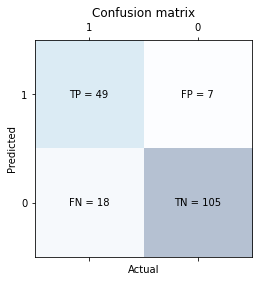

In [ ]:
def get_confusion_matrix(y_actual, y_predicted):
    pred = pd.Series(y_predicted, dtype='category').cat.set_categories([1, 0])
    act = pd.Series(y_actual, dtype='category').cat.set_categories([1, 0])
    conf_mat = act.groupby([pred, act]).count().unstack()
    return conf_mat



def get_confusion_matrix_by_thresholds(y_actual, y_probs, threshold):
    y_predicted = np.where(y_probs > threshold, 1, 0)
    pred = pd.Series(y_predicted, dtype='category').cat.set_categories([1, 0])
    act = pd.Series(y_actual, dtype='category').cat.set_categories([1, 0])
    confusion_matrix = pred.groupby([ pred, act]).count().unstack()
    return confusion_matrix

def plot_confusion_matrix(confusion_matrix=None, tp=None, fp=None, fn=None, tn=None):
    if confusion_matrix is None:
        confusion_matrix = np.array([tp, fp, fn, tn]).reshape((2,2))
    fig, axs = plt.subplots(1)
    axs.set_xticks([0, 1], [1, 0])
    axs.set_yticks([0, 1], [1, 0])
    axs.set_xlabel('Actual')
    axs.set_ylabel('Predicted')
    axs.set_title('Confusion matrix')
    axs.matshow(confusion_matrix, cmap=plt.cm.Blues, alpha=.3)
    axs.text(x=0, y=0,s = 'TP = ' + str(confusion_matrix[0, 0]), va='center', ha='center')
    axs.text(x=0, y=1,s = 'FN = ' + str(confusion_matrix[1, 0]), va='center', ha='center')
    axs.text(x=1, y=0,s = 'FP = ' + str(confusion_matrix[0, 1]), va='center', ha='center')
    axs.text(x=1, y=1,s = 'TN = ' + str(confusion_matrix[1, 1]), va='center', ha='center')
    axs.plot()
    
    
c_m = get_confusion_matrix(y_test, y_predicted)
plot_confusion_matrix(c_m.values)

tp, fp, fn, tn = c_m.values[0, 0], c_m.values[0, 1], c_m.values[1, 0], c_m.values[1, 1]
precision = tp/ (tp + fp)
print('precision is', precision)

recall = tp / (tp + fn)
print('recall is ', recall)

accuracy = (tp + tn) / (tp + tn + fp + fn)
print('accuracy is', accuracy)

f_score = 2 * ( precision * recall) / (precision + recall)
print('f_score is', f_score)

0.8787313432835824

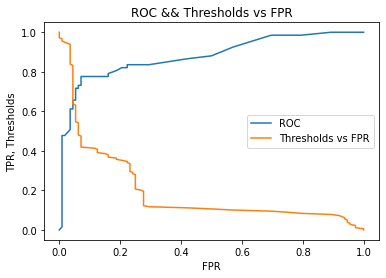

In [ ]:
def my_roc_curve(y_actual, y_probs, thresholds=None):
    if len(y_actual) != len(y_probs):
        raise Exception
    if thresholds is None:
        thresholds = np.linspace(0, 1, len(y_actual) + 1)
    tpr, fpr = [], []
    for threshold in thresholds:
        conf_mat = get_confusion_matrix_by_thresholds(y_actual, y_probs, threshold)
        tp = conf_mat.values[0, 0]
        fn = conf_mat.values[1, 0]
        tpr.append(tp / (tp + fn))
        fp = conf_mat.values[0, 1]
        tn = conf_mat.values[1, 1]
        fpr.append(fp / (fp + tn))
    return np.array(tpr), np.array(fpr), np.array(thresholds)

def my_auc(x, y):
    S = 0
    for i in range(len(x) - 1):
        S += (y[i] + y[i + 1]) * (x[i + 1] - x[i]) * 0.5    
    return abs(S)

tpr, fpr, t = my_roc_curve(y_test, y_proba[:, 1])
fig, axs = plt.subplots(1)
axs.set_xlabel('FPR')
axs.set_ylabel('TPR, Thresholds')
axs.set_title('ROC && Thresholds vs FPR')
roc, = axs.plot(fpr, tpr, label='ROC')
thr, = axs.plot(fpr, t, label='Thresholds vs FPR')
axs.legend()
# axs.legend(handles=[roc], loc='right')
# axs.legend(handles=[thr], loc='upper center')
my_auc(fpr, tpr)

In [ ]:
threshold = t[np.argmax(tpr-fpr)]
threshold

0.41899441340782123

60


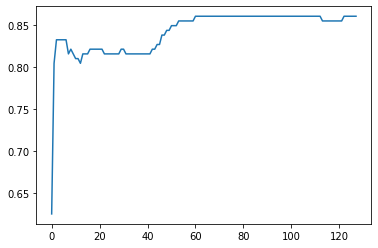

In [ ]:
print(np.argmax(nn.efficiency))
plt.plot(nn.epochs, nn.efficiency)

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Titanic /test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df_test.isna().sum().sort_values(ascending=False)


Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [ ]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


In [ ]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df_test_val = df_test[df_test.columns.difference(['PassengerId', 'Name', 'Cabin', 'Ticket'])]
df_test_val

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,34.50000,Q,7.8292,0,3,male,0
1,47.00000,S,7.0000,0,3,female,1
2,62.00000,Q,9.6875,0,2,male,0
3,27.00000,S,8.6625,0,3,male,0
4,22.00000,S,12.2875,1,3,female,1
...,...,...,...,...,...,...,...
413,30.27259,S,8.0500,0,3,male,0
414,39.00000,C,108.9000,0,1,female,0
415,38.50000,S,7.2500,0,3,male,0
416,30.27259,S,8.0500,0,3,male,0


In [ ]:
df_test_val['Sex'] = df_test_val['Sex'].replace(['male', 'female'], [0, 1])
df_test_val['Embarked'] = df_test_val['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2])
df_test_val

<ipython-input-130-94a7ce95715b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_val['Sex'] = df_test_val['Sex'].replace(['male', 'female'], [0, 1])
<ipython-input-130-94a7ce95715b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_val['Embarked'] = df_test_val['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2])


,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,34.50000,2,7.8292,0,3,0,0
1,47.00000,0,7.0000,0,3,1,1
2,62.00000,2,9.6875,0,2,0,0
3,27.00000,0,8.6625,0,3,0,0
4,22.00000,0,12.2875,1,3,1,1
...,...,...,...,...,...,...,...
413,30.27259,0,8.0500,0,3,0,0
414,39.00000,1,108.9000,0,1,1,0
415,38.50000,0,7.2500,0,3,0,0
416,30.27259,0,8.0500,0,3,0,0


In [ ]:
df_test_val.isna().sum()

Age         0
Embarked    0
Fare        0
Parch       0
Pclass      0
Sex         0
SibSp       0
dtype: int64

In [ ]:
scaled_data = MinMaxScaler().fit_transform(df_test_val)
scaled_data

array([[0.4527232 , 1.        , 0.01528158, ..., 1.        , 0.        ,
        0.        ],
       [0.61756561, 0.        , 0.01366309, ..., 1.        , 1.        ,
        0.125     ],
       [0.8153765 , 1.        , 0.01890874, ..., 0.5       , 0.        ,
        0.        ],
       ...,
       [0.50547277, 0.        , 0.01415106, ..., 1.        , 0.        ,
        0.        ],
       [0.39697468, 0.        , 0.01571255, ..., 1.        , 0.        ,
        0.        ],
       [0.39697468, 0.5       , 0.0436405 , ..., 1.        , 0.        ,
        0.125     ]])

In [ ]:
y_test_pred = []
for data in scaled_data:
  nn_answer = nn.query(data)
  res = 1 if nn_answer[1] > 0.5 else 0
  y_test_pred.append(res)
len(y_test_pred)

418

In [ ]:
submission_df = pd.DataFrame({'PassengerId':df_test['PassengerId'], 'Survived':y_test_pred})
submission_df.to_csv('/content/drive/MyDrive/Colab Notebooks/ML/Titanic / submission.csv', index=False)